<h1> Create Grid Plot </h1>

In [1]:
import sys
import pickle
sys.path.append('.')

from testing_normal_functions import spectral_emb, clt_sample, plot_spherical_data,\
                                    mvn_assump_samples_wrapper, samples_under_assump,\
                                    print_pickle_data, calculate_avg_wass_dist
import numpy as np
from scipy.stats import beta, uniform, wasserstein_distance
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd


np.random.seed(45)

μ_1 = np.array([0.25,0.75])
μ_2 = np.array([0.75, 0.25])

N_t=1000

In [2]:
beta_params = [2**i for i in range(7)]
beta_params

[1, 2, 4, 8, 16, 32, 64]

In [4]:
img_arr = np.zeros((len(beta_params), len(beta_params)))

for (i,α) in enumerate(beta_params):
    for (j,β) in enumerate(beta_params):
        prior = lambda : beta.rvs(α, β)
        exp_rho = α / (α + β)
        second_mom_rho = beta.moment(2, α, β)
        print(f" Calculating stats for beta({α},{β}): ")
        avg_dist= calculate_avg_wass_dist(prior, μ_1, μ_2, exp_rho, second_mom_rho, N_t=1000, N_ρ=1_000, filename=f"beta_{α}_{β}_data")
        print(f"beta_{α}_{β}_data avg dist: {avg_dist}")
        img_arr[i,j] = avg_dist
        

 Calculating stats for beta(1,1): 


 96%|█████████▌| 960/1000 [02:10<00:05,  7.37it/s]


KeyboardInterrupt: 

Text(0, 0.5, 'log_2(β)')

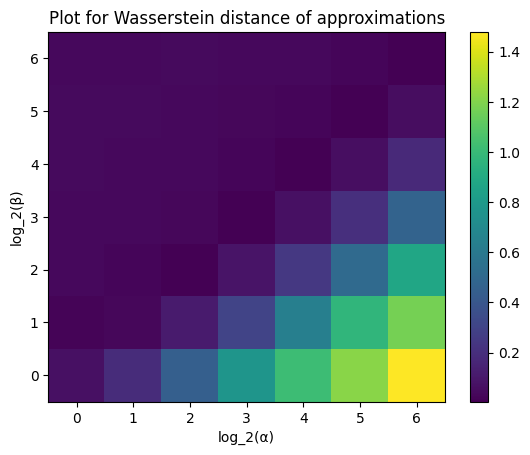

In [32]:
fig, ax = plt.subplots()
img = ax.pcolor(range(7), range(7), img_arr)
ax.set_aspect("auto")
plt.colorbar(img)
plt.title(f"Plot for Wasserstein distance of approximations")
plt.xlabel('log_2(α)')
plt.ylabel('log_2(β)')

In [40]:
print(pd.DataFrame(img_arr))

          0         1         2         3         4         5         6
0  0.063513  0.186080  0.442461  0.773713  1.014277  1.214728  1.477948
1  0.021442  0.028729  0.111114  0.303478  0.634312  0.969039  1.172397
2  0.033242  0.024792  0.009424  0.081091  0.245033  0.510633  0.874913
3  0.037488  0.038223  0.027875  0.007253  0.066292  0.204277  0.465395
4  0.041627  0.037773  0.034639  0.024376  0.008773  0.060037  0.176915
5  0.041038  0.040695  0.036474  0.033078  0.024120  0.007064  0.055652
6  0.038566  0.038060  0.039053  0.037047  0.033930  0.026481  0.004317


In [36]:
with open('beta_1_1_data.pkl', 'rb') as file:
    for _ in range(5):
        avg_dist = pickle.load(file)

0.06351332637209517


In [ ]:
for α in beta_params:
    for β in beta_params:
        with open(f"beta_{α}_{β}_data.pkl", 'rb') as file:
            for _ in range(5):
                avg_dist = pickle.load(file)
            


In [39]:
print(pd.DataFrame(img_arr))

          0         1         2         3         4         5         6
0  0.063513  0.186080  0.442461  0.773713  1.014277  1.214728  1.477948
1  0.021442  0.028729  0.111114  0.303478  0.634312  0.969039  1.172397
2  0.033242  0.024792  0.009424  0.081091  0.245033  0.510633  0.874913
3  0.037488  0.038223  0.027875  0.007253  0.066292  0.204277  0.465395
4  0.041627  0.037773  0.034639  0.024376  0.008773  0.060037  0.176915
5  0.041038  0.040695  0.036474  0.033078  0.024120  0.007064  0.055652
6  0.038566  0.038060  0.039053  0.037047  0.033930  0.026481  0.004317
